In [1]:
import sys
sys.path.append('../../lorenz')
import lorenz

/home/tlj/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [19]:
syspar = {'sigma': 10.0, 'rho': 28, 'beta': 8/3}
simpar = {'t_delta': 0.001, 'N': 30000}
xyz0 = {'x0': 0.1, 'y0': 0.1, 'z0': 0.1}
familyname = 'example1'

In [20]:
xyzd = lorenz.run.run_master(syspar, simpar, xyz0, familyname, save_and_plot=False)

In [7]:
from matplotlib.colors import ListedColormap, BoundaryNorm    
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import matplotlib.pyplot as plt
import numpy as np

In [5]:
%matplotlib inline

(0.08587424922546127, 53.72420670715569)

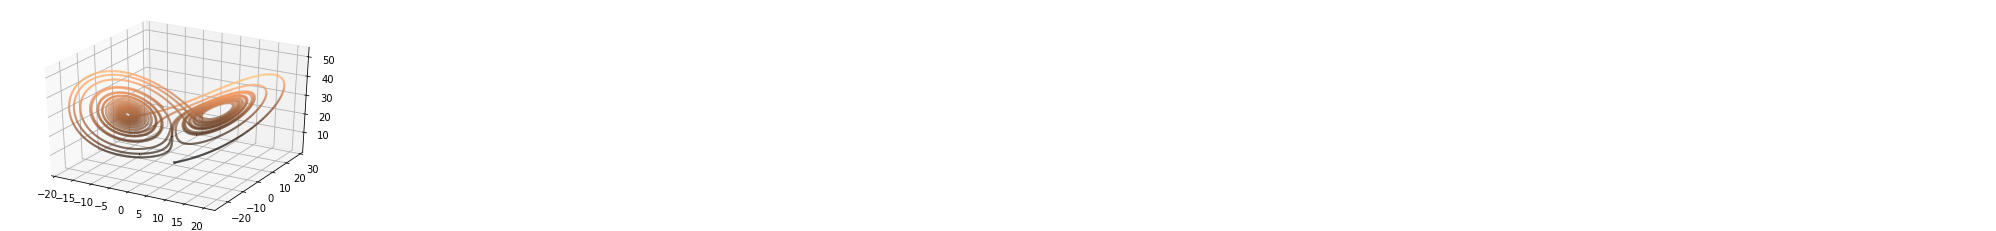

In [21]:
# following the method in 
# https://stackoverflow.com/questions/38079366/matplotlib-line3dcollection-multicolored-line-edges-are-jagged

# Unpack
x = xyzd['x'] 
y = xyzd['y']
z = xyzd['z']
d = xyzd['z']

points = np.array([x, y, z]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the 3D-line collection object
lc = Line3DCollection(segments, cmap=plt.get_cmap('copper'),
                      norm=plt.Normalize(0, d.max()))
lc.set_array(d) 
lc.set_linewidth(2)

fig = plt.figure()
f = 1.1
ax = fig.gca(projection='3d')
ax.add_collection3d(lc, zs=z, zdir='z')
ax.set_xlim(x.min()*f, x.max()*f)
ax.set_ylim(y.min()*f, y.max()*f)
ax.set_zlim(z.min()*f, z.max()*f)


In [22]:
# Making the figure 
# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

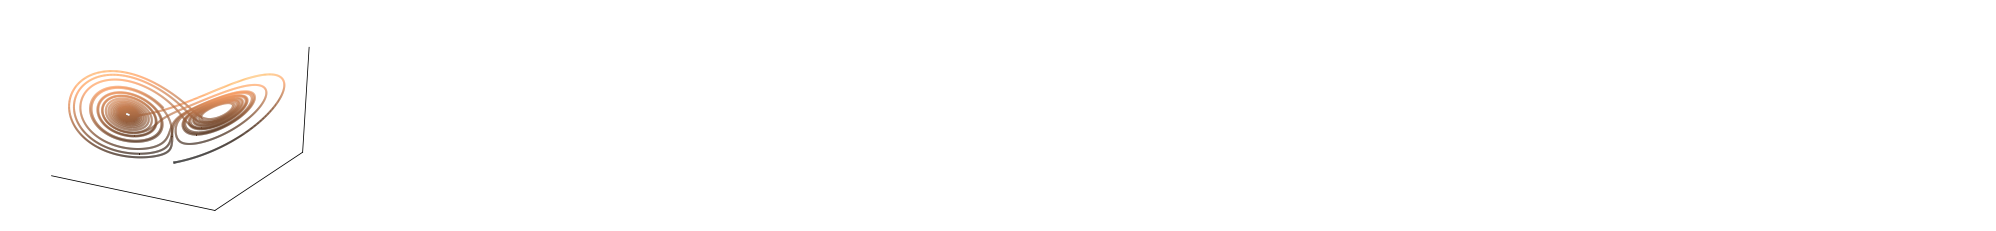

In [23]:
fig

In [24]:
fig.savefig('lorenz.pdf')